In [126]:
# Importing the libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import joblib

import warnings
warnings.filterwarnings('ignore')






In [127]:
# Loading  dataset

df = pd.read_csv('train_set.csv')
print('Shape',df.shape)
df.head()

Shape (55200, 18)


,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target
0,0,delivered,39.90,15.38,1.0,1.0,2018-08-08 13:03:52.000000,2018-08-08 13:15:22.255565,2018-08-15 00:00:00.000000,2018-08-13 22:11:44.366805,Sao Paulo,SP,44.0,consoles_games,59.0,434.0,3.0,5
1,1,delivered,279.99,31.82,NaN,1.0,2018-04-30 20:24:33.000000,2018-05-01 03:15:02.640177,2018-05-15 00:00:00.000000,2018-05-09 19:50:37.813505,Sao Paulo,SP,51.0,housewares,35.0,1800.0,1.0,3
2,2,delivered,144.90,16.77,1.0,1.0,2017-08-01 09:49:05.000000,2017-08-02 02:55:58.162450,2017-08-23 00:00:00.000000,2017-08-11 19:04:16.644822,NaN,PR,842.0,health_beauty,63.0,580.0,5.0,5
3,3,delivered,170.00,16.82,1.0,1.0,2017-11-29 11:47:31.000000,2017-11-29 11:57:31.647096,2017-12-20 00:00:00.000000,2017-12-08 16:31:45.044090,Santa Gertrudes,SP,135.0,watches_gifts,35.0,514.0,2.0,5
4,4,delivered,40.90,14.10,1.0,1.0,2017-10-23 14:32:55.000000,2017-10-23 14:49:10.354927,2017-11-09 00:00:00.000000,2017-11-07 21:12:19.296363,Sao Paulo,SP,40.0,health_beauty,31.0,2392.0,2.0,5


In [128]:
# Checking for missing values

df.isnull().sum()


ID                                  0
order_status                     2719
order_products_value             2700
order_freight_value              2692
order_items_qty                  2764
order_sellers_qty                2618
order_purchase_timestamp         2634
order_aproved_at                 2720
order_estimated_delivery_date    2711
order_delivered_customer_date    4002
customer_city                    2645
customer_state                   2648
customer_zip_code_prefix         2760
product_category_name_english    2599
product_name_lenght              2692
product_description_lenght       2707
product_photos_qty               2723
target                              0
dtype: int64

In [129]:
#drop missing values

df = df.dropna()
print('Shape',df.shape)
df.isnull().sum()

Shape (24257, 18)


ID                               0
order_status                     0
order_products_value             0
order_freight_value              0
order_items_qty                  0
order_sellers_qty                0
order_purchase_timestamp         0
order_aproved_at                 0
order_estimated_delivery_date    0
order_delivered_customer_date    0
customer_city                    0
customer_state                   0
customer_zip_code_prefix         0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
target                           0
dtype: int64

In [130]:
# unique values in non-numeric columns

for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].nunique())

        

order_status 2
order_purchase_timestamp 23959
order_aproved_at 24017
order_estimated_delivery_date 456
order_delivered_customer_date 24017
customer_city 2516
customer_state 27
product_category_name_english 68


In [131]:
# label encoding for order_status , customer_state and product_category_name

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['order_status'] = le.fit_transform(df['order_status'])
df['customer_state'] = le.fit_transform(df['customer_state'])
df['product_category_name_english'] = le.fit_transform(df['product_category_name_english'])

df.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target
0,0,1,39.9,15.38,1.0,1.0,2018-08-08 13:03:52.000000,2018-08-08 13:15:22.255565,2018-08-15 00:00:00.000000,2018-08-13 22:11:44.366805,Sao Paulo,25,44.0,15,59.0,434.0,3.0,5
3,3,1,170.0,16.82,1.0,1.0,2017-11-29 11:47:31.000000,2017-11-29 11:57:31.647096,2017-12-20 00:00:00.000000,2017-12-08 16:31:45.044090,Santa Gertrudes,25,135.0,67,35.0,514.0,2.0,5
4,4,1,40.9,14.10,1.0,1.0,2017-10-23 14:32:55.000000,2017-10-23 14:49:10.354927,2017-11-09 00:00:00.000000,2017-11-07 21:12:19.296363,Sao Paulo,25,40.0,41,31.0,2392.0,2.0,5
6,6,1,49.7,13.37,1.0,1.0,2018-03-03 18:15:25.000000,2018-03-03 18:35:31.231114,2018-03-21 00:00:00.000000,2018-03-21 22:28:46.122201,Sao Paulo,25,39.0,37,56.0,296.0,3.0,5
7,7,1,53.7,1.17,3.0,1.0,2018-09-26 13:31:25.000000,2018-09-26 13:45:14.715259,2018-10-02 00:00:00.000000,2018-09-28 15:18:35.113808,Sao Paulo,25,28.0,62,52.0,1171.0,1.0,5


In [132]:
# Let's first convert the columns to datetime type if they are not already
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_aproved_at'] = pd.to_datetime(df['order_aproved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Feature Engineering
# Time Differences
df['approval_time'] = (df['order_aproved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / (60*60)  # in hours
df['actual_delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.total_seconds() / (60*60*24)  # in days
df['delivery_deviation'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.total_seconds() / (60*60*24)  # in days

# Temporal Features
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_day'] = df['order_purchase_timestamp'].dt.day
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['is_weekend'] = df['order_purchase_timestamp'].dt.dayofweek.isin([5, 6]).astype(int)  # 5 and 6 represent Saturday and Sunday


# Cycle Features
df['hour_sin'] = np.sin(2 * np.pi * df['purchase_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['purchase_hour'] / 24)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['purchase_dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['purchase_dayofweek'] / 7)

# Duration Features
df['approval_to_delivery_duration'] = (df['order_delivered_customer_date'] - df['order_aproved_at']).dt.total_seconds() / (60*60*24)  # in days
df['delivery_to_confirmation_duration'] = (df['order_delivered_customer_date'] - df['order_delivered_customer_date']).dt.total_seconds() / (60*60*24)  # in days

# Print the DataFrame with engineered features
print(df.head())

   ID  order_status  order_products_value  order_freight_value  \
0   0             1                  39.9                15.38   
3   3             1                 170.0                16.82   
4   4             1                  40.9                14.10   
6   6             1                  49.7                13.37   
7   7             1                  53.7                 1.17   

   order_items_qty  order_sellers_qty order_purchase_timestamp  \
0              1.0                1.0      2018-08-08 13:03:52   
3              1.0                1.0      2017-11-29 11:47:31   
4              1.0                1.0      2017-10-23 14:32:55   
6              1.0                1.0      2018-03-03 18:15:25   
7              3.0                1.0      2018-09-26 13:31:25   

            order_aproved_at order_estimated_delivery_date  \
0 2018-08-08 13:15:22.255565                    2018-08-15   
3 2017-11-29 11:57:31.647096                    2017-12-20   
4 2017-10-23 14:49:1

In [133]:
# drop city column

df = df.drop('customer_city', axis=1)

# drop columns that are not needed
df = df.drop(['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date'], axis=1)

In [134]:
# Create a dataframe to store model and r2_score

model_data = pd.DataFrame(columns=['model','r2_score'])
model_data

,model,r2_score


In [135]:
# Spliting the data into training and testing sets

X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
X.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,...,purchase_day,purchase_dayofweek,purchase_hour,is_weekend,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,approval_to_delivery_duration,delivery_to_confirmation_duration
0,0,1,39.9,15.38,1.0,1.0,25,44.0,15,59.0,...,8,2,13,0,-0.258819,-9.659258e-01,0.974928,-0.222521,5.372478,0.0
3,3,1,170.0,16.82,1.0,1.0,25,135.0,67,35.0,...,29,2,11,0,0.258819,-9.659258e-01,0.974928,-0.222521,9.190433,0.0
4,4,1,40.9,14.10,1.0,1.0,25,40.0,41,31.0,...,23,0,14,0,-0.500000,-8.660254e-01,0.000000,1.000000,15.266076,0.0
6,6,1,49.7,13.37,1.0,1.0,25,39.0,37,56.0,...,3,5,18,1,-1.000000,-1.836970e-16,-0.974928,-0.222521,18.161978,0.0
7,7,1,53.7,1.17,3.0,1.0,25,28.0,62,52.0,...,26,2,13,0,-0.258819,-9.659258e-01,0.974928,-0.222521,2.064819,0.0


In [137]:
# Extreme Gradient Boosting

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

model_data.loc[len(model_data)] = ['XGBRegressor', r2]
model_data




R2 Score: 0.14969165239056337


,model,r2_score
0,XGBRegressor,0.149692


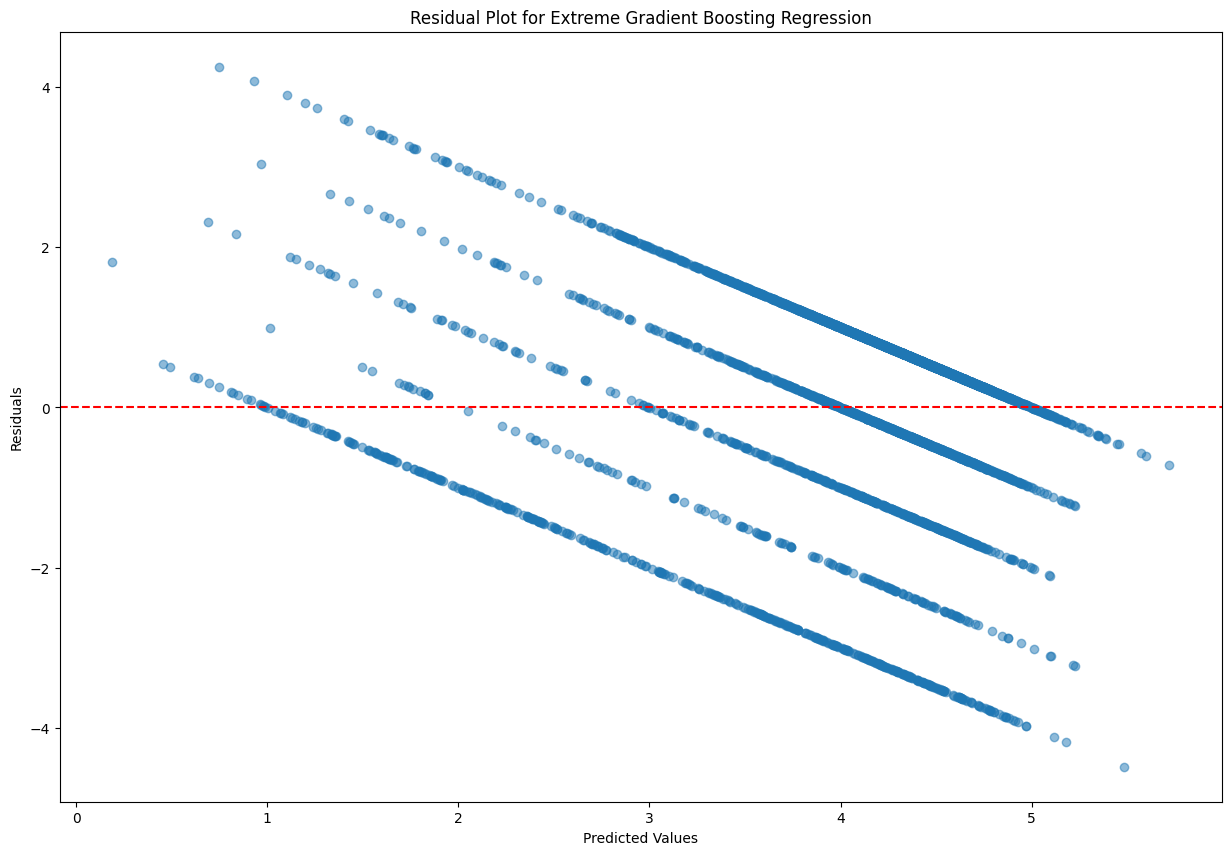

In [138]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residual plot
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Extreme Gradient Boosting Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [139]:
# Linear Regression

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)
y_pred = LinearRegression_model.predict(X_test)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#store the model and r2_score
model_data.loc[len(model_data)] = ['LinearRegression', r2]
model_data

R^2: 0.11971973789365264


,model,r2_score
0,XGBRegressor,0.149692
1,LinearRegression,0.119720


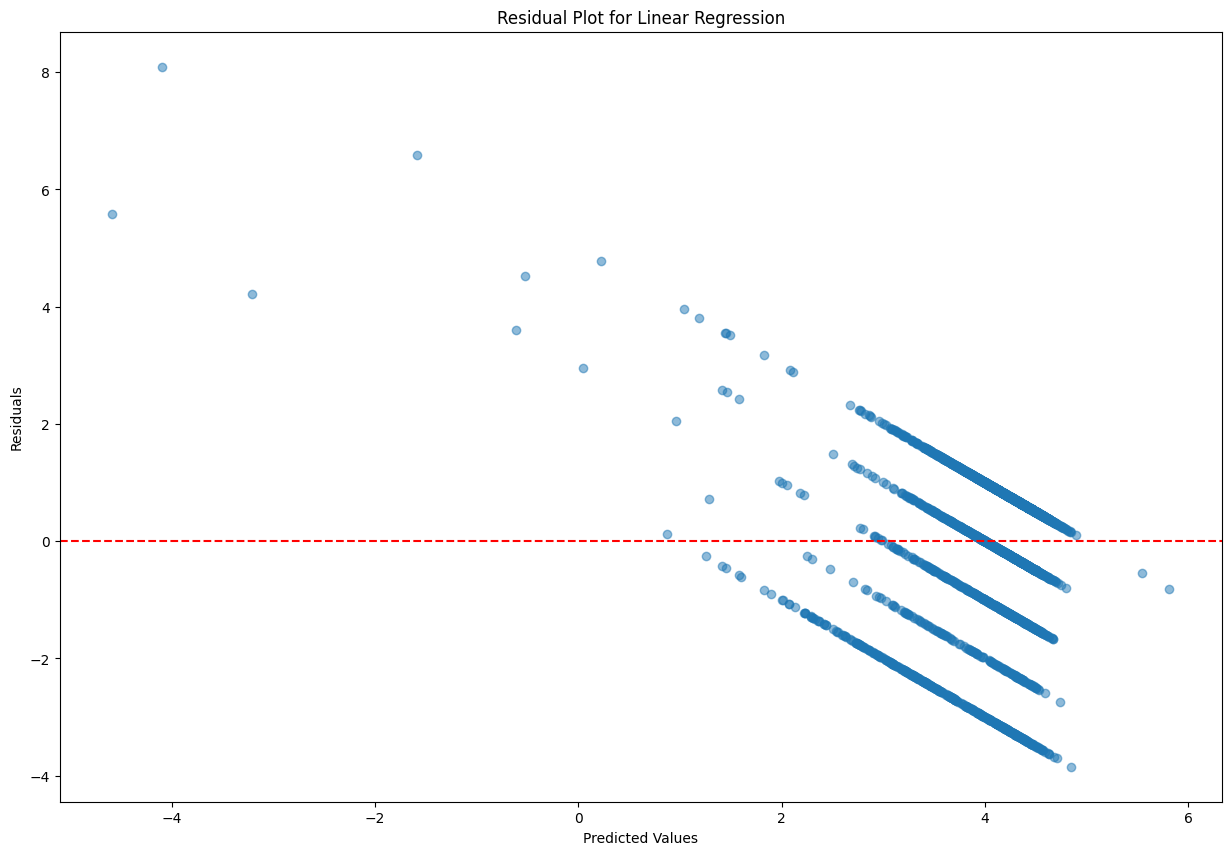

In [140]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residual plot
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [141]:
# Random Forest

RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)
y_pred = RandomForest_model.predict(X_test)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#store the model and r2_score
model_data.loc[len(model_data)] = ['RandomForest', r2]
model_data

R^2: 0.18925649564554337


,model,r2_score
0,XGBRegressor,0.149692
1,LinearRegression,0.119720
2,RandomForest,0.189256


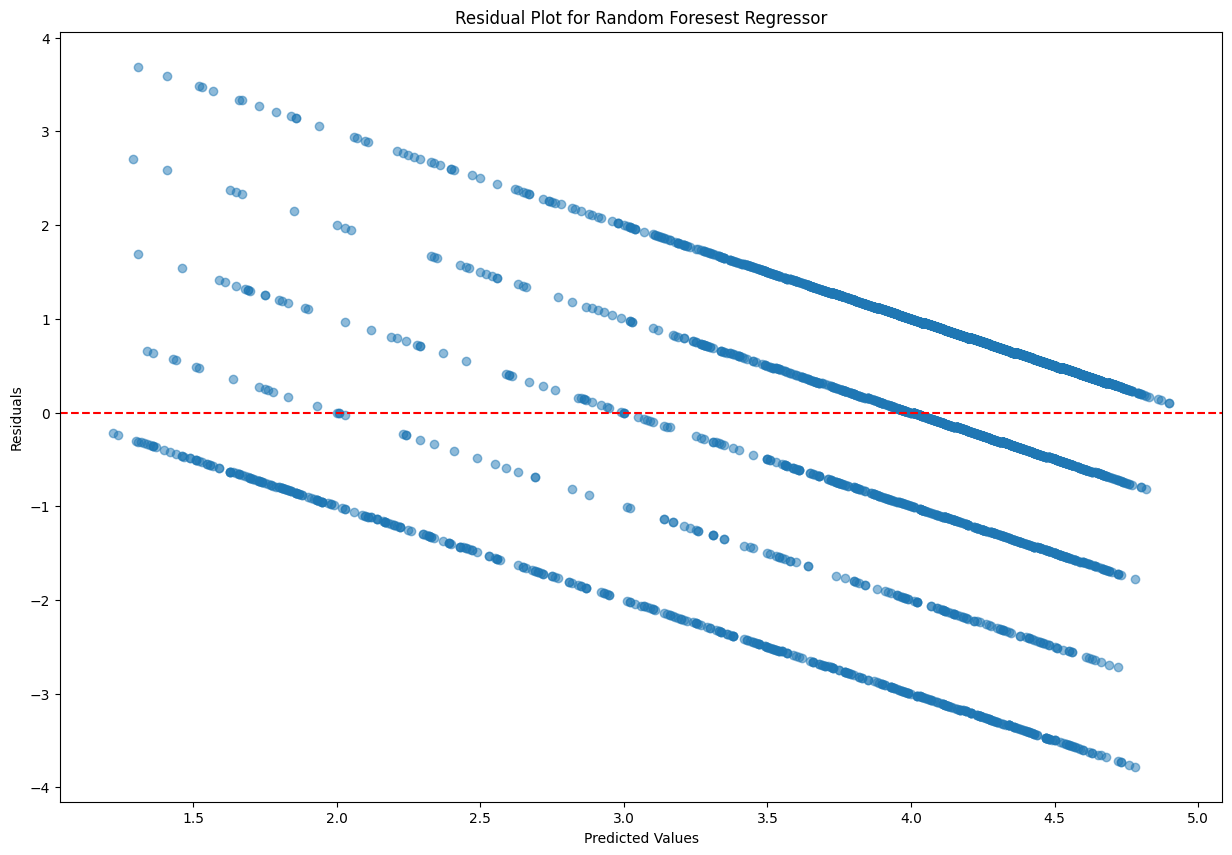

In [142]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residual plot
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Random Foresest Regressor')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [143]:

# Initialize and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict using the trained Gradient Boosting Regression model
y_pred = gb_model.predict(X_test)

# Calculate the R^2 score
r2_gb = r2_score(y_test, y_pred)
print('R^2 for Gradient Boosting Regression:', r2_gb)

# Store the model and R^2 score
model_data.loc[len(model_data)] = ['Gradient Boosting Regression', r2_gb]
model_data


R^2 for Gradient Boosting Regression: 0.2084017513798272


,model,r2_score
0,XGBRegressor,0.149692
1,LinearRegression,0.119720
2,RandomForest,0.189256
3,Gradient Boosting Regression,0.208402


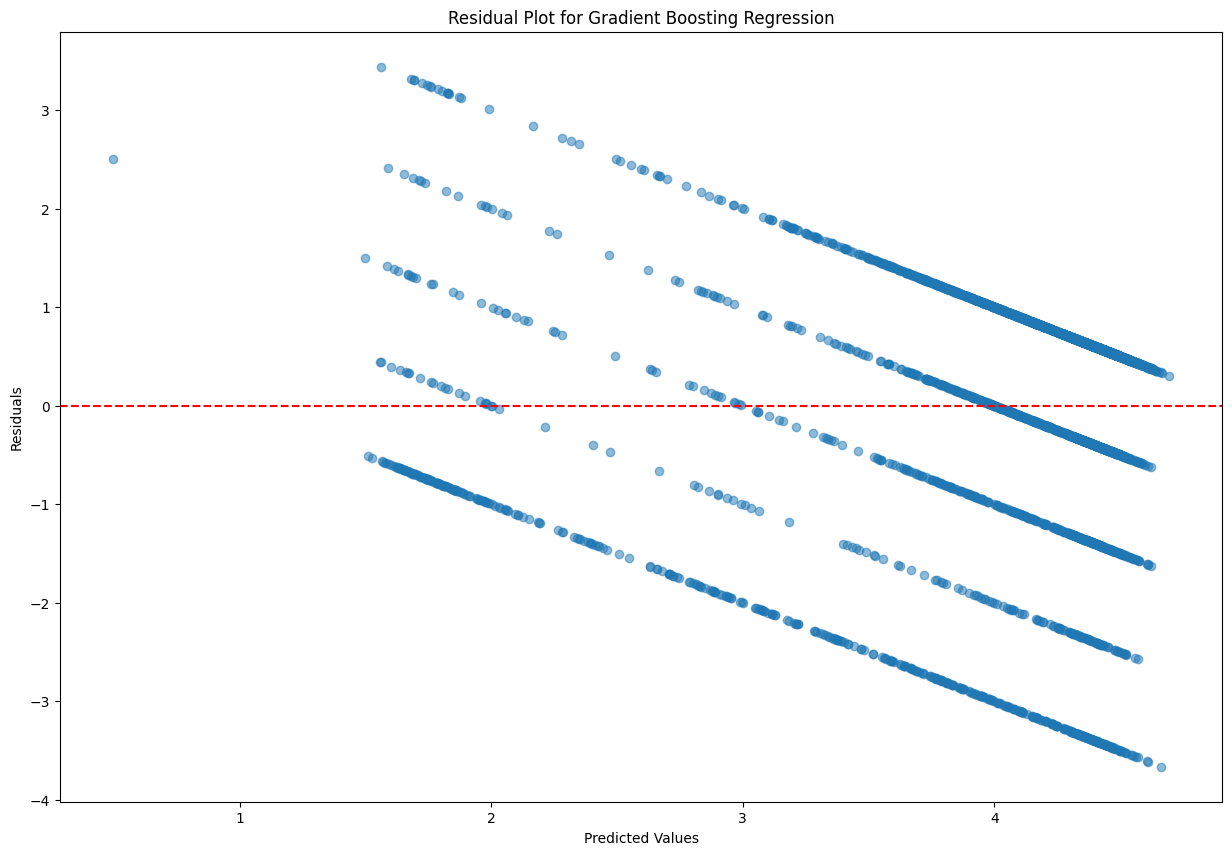

In [144]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residual plot
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Gradient Boosting Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [145]:
# ADABOOST

from sklearn.ensemble import AdaBoostRegressor
AdaBoost_model = AdaBoostRegressor()
AdaBoost_model.fit(X_train, y_train)
y_pred = AdaBoost_model.predict(X_test)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)

#store the model and r2_score
model_data.loc[len(model_data)] = ['AdaBoost', r2]
model_data

,model,r2_score
0,XGBRegressor,0.149692
1,LinearRegression,0.119720
2,RandomForest,0.189256
3,Gradient Boosting Regression,0.208402
4,AdaBoost,0.142833


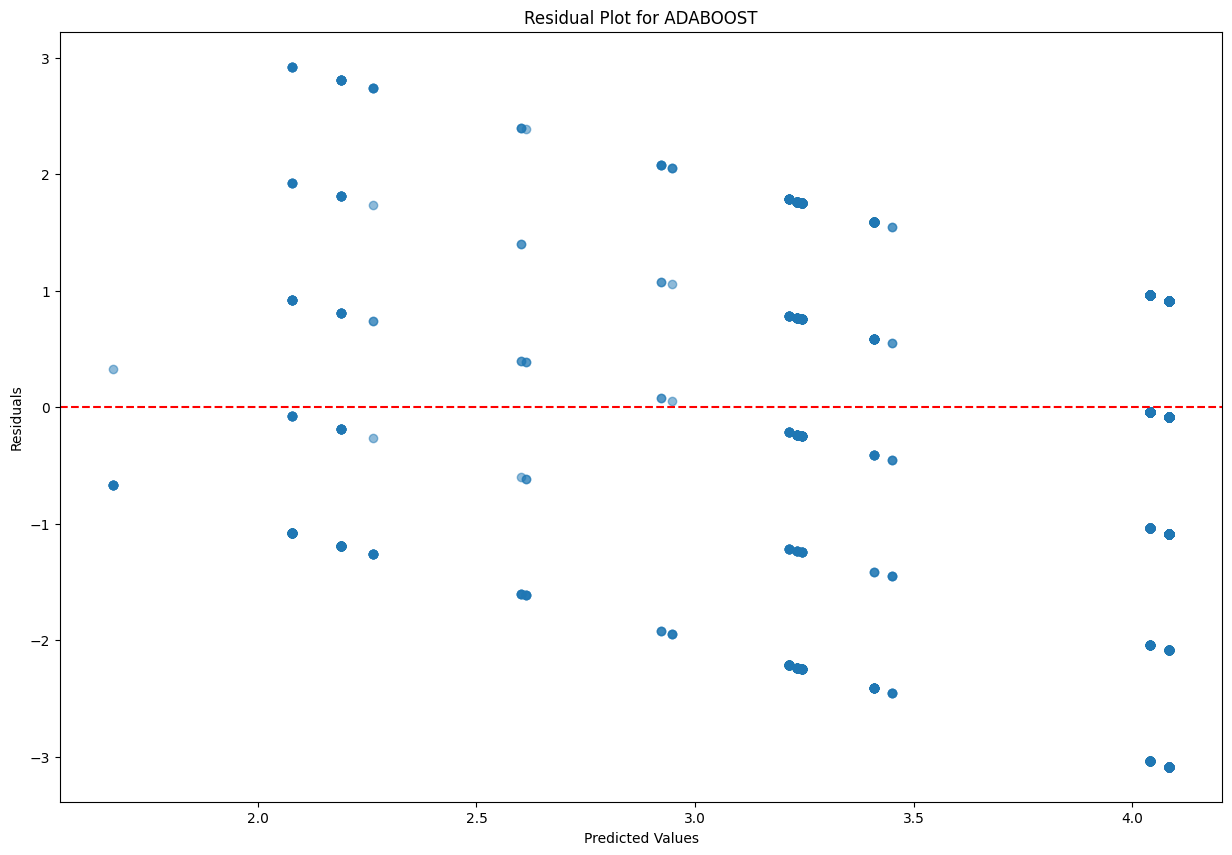

In [146]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residual plot
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for ADABOOST')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Text(0.5, 1.0, 'Comparison of Regression Models')

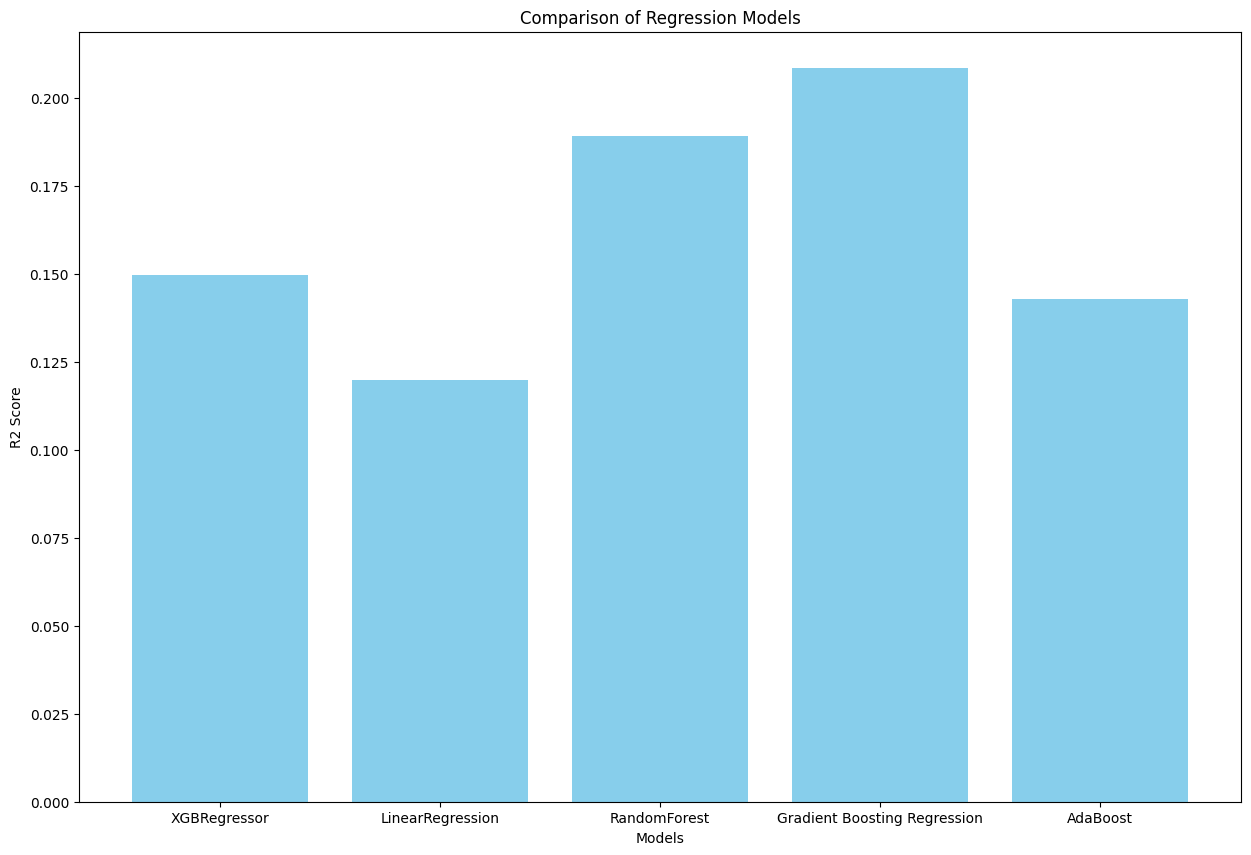

In [147]:
# Plotting the bar plot
plt.figure(figsize=(15, 10))
plt.bar(model_data['model'], model_data['r2_score'], color='skyblue')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of Regression Models')

## Conclusion

Based on the analysis conducted, it is evident that Gradient Boosting Regression exhibits the highest R^2 score among the compared regression models, indicating its superior capability in explaining and predicting the variance within the dataset.

In [148]:
#Storeing the best Model

joblib.dump(GradientBoostingRegressor, 'model.pkl')

# Store columns
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')


['model_columns.pkl']

In [149]:
# Predict on the test set and store the results

test_predictions = X_test.copy()
test_predictions['target'] = y_pred
test_predictions.to_csv('test_predictions.csv', index=False)

#drop all columns except id and target
test_predictions = test_predictions[['ID','target']]
test_predictions.to_csv('test_predictions.csv', index=False)

print('Test set with predictions stored in test_predictions.csv')

Test set with predictions stored in test_predictions.csv
